In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 200
import datetime
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date


Bad key "text.kerning_factor" on line 4 in
/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
old_data_folder = '/Users/simonneumeyer/Dropbox/DO-FILES/data/'
credit_filename = 'Kosovo Credity Registry/LoanApplications-Final.xlsx'

In [3]:
cols_rename_dict = {'PersonBusinessNo': 'lenderfiscalid', 'FakepersonbusinessNo': 'fuid_lender',
                    'IdNumber': 'fiscalid', 'FakeIdNumber': 'fuid',
                    'LoanNo': 'loanid', 'Id': 'procedureid',
                    'ApprovalDate': 'approvaldate', 'BirthDate': 'birthdate',
                    'Institution': 'institution', 'PersonType': 'persontype',
                    'LegalEntityType': 'legaltype', 'Municipality': 'municipality',
                    'MaritalStatus': 'maritalstatus', 'Occupation': 'occupation', 'Income': 'income',
                    'LoanType': 'loantype', 'LoanActivityType': 'loanactvitytype',
                    'LoanPeriod': 'loanperiod', 'Period': 'loanduration',
                    'PaymentFrequency': 'payfreq', 'Amount': 'loanamount',
                    'OutstandingAmount': 'amountout', 'Currency': 'currency',
                    'MaturityDate': 'maturity', 'DisbursementDate': 'disbursementdate',
                    'DisbursementAmount': 'disbursedamount', 'EntryDateTime': 'entrydate',
                    'LoanClassification': 'loanclass', 'CollateralValue': 'collateralvalue',
                    'CollateralUsed': 'collateral', 'LoanPurpose': 'loanpurpose',
                    'Country': 'country', 'NominalInterestRate': 'irate_nominal',
                    'EffectiveInterestRate': 'irate_effec', 'Code': 'code',
                    'CompanySize': 'sizeclass', 'Fund': 'fund',
                    'FundCoveredPercentage': 'fundcoverage', 'Reprogrammed': 'reprogrammed',
                    'Insolvency': 'insolvency'
                   }
translate_dict = {'Banka': 'Bank',
                  'Kompani sigurimi': 'Insurance Company',
                  'Juridik': 'Legal',
                  'Jorezident Juridik': 'Non-resident legal',
                  'Fizik': 'Physic',
                  'Jorezident Fizik': 'Non-resident physic',
                  'Firmë individuale': 'Personal Business Enterprise',
                  'Kompani e huaj': 'Foreign Company',
                  'Kooperativë bujqësore': 'Agricultural Co-Op',
                  'Ndërmarrje nën juridiksionin a KPA-së':'Other Enterprises under KPA Jurisdiction',
                  'Ndërmarrje publike': 'Public-Owned Enterprise',
                  'Ndërmarrje shoqërore': 'Socially-Owned Enterprise',
                  'Organizatë joqeveritare - OJQ': 'Non-governmental organization (NGO)',
                  'Partneritet i limituar': 'Limited partnership',
                  'Partneritet i përgjithshëm': 'General partnership',
                  'Shoqëri aksionare (Sh.A.)': 'Joint-stock company',
                  'Shoqëri me përgjegjësi të kufizuar (Sh.P.K.)': 'Limited liability company',
                  'I/E Martuar': 'Married',
                  'I/E Ndare': 'Divorced', 
                  'I/E Pamartuar': 'Single',
                  'Asete tjera Kreditore': 'Other credit assets',
                  'Faktoring': 'Factoring',
                  'Garancione': 'Warranty',
                  'Hua': 'Loan',
                  'Kredi Hipotekare Komerciale': 'Commercial mortgage loan',
                  'Kredi Hipotekare Rezidenciale': 'Residential mortgage loan',
                  'Kredit Kartele': 'Credit card',
                  'Leter kredie': 'Letter of credit',
                  'Lizing Operativ': 'Leasing',
                  'Lizingu': 'Lease',
                  'Mbiterheqje': 'Overdraft',
                  'Tjera': 'Other',
                  'Zotime tjera': 'Other commitments',
                  'Ditor': 'Daily',
                  'Mujor': 'Monthly',
                  'Vjetor': 'Annual',
                  'Ditore': 'Daily',
                  'Mujore': 'Monthly',
                  'Kuartale': 'Quarterly',
                  'Gjysmevjetore': 'Semi-annual',
                  'Vjetore': 'Annual',
                  'E Parregullt': 'Irregular',
                  'E plote': 'Full',
                  'Sipas kerkeses': 'On request',
                  'Riprogramim': 'Reprogramming',
                  'Ristrukturim': 'Restructuring',
                  'Fondi Kosovar për Garanci Kreditore': 'Kosovo Credit Guarantee Fund',
                  'Nuk mbulohet nga fondi': 'Not covered by fund',
                 }

country_dict = {'KOSOVA': 'Kosovo', 
               'KOSOVE': 'Kosovo', 
               'KOSOVO': 'Kosovo', 
               'KOSOVË': 'Kosovo', 
               'KS': 'Kosovo', 
               'Kosova': 'Kosovo', 
               'Kosovar': 'Kosovo', 
               'Kosove': 'Kosovo', 
               'Kosovo': 'Kosovo',
               'Kosovë': 'Kosovo', 
               'XK': 'Kosovo', 
               'xk': 'Kosovo', 
               'Republika e Kosovës': 'Kosovo',
               'AL': 'Albania', 
               'ALBANIA': 'Albania', 
               'SHQIPERI': 'Albania', 
               'SHQIPRI': 'Albania', 
               'MACEDONIA': 'Macedonia', 
               'MK': 'Macedonia', 
               'Macedonia': 'Macedonia', 
               'Maqedoni': 'Macedonia', 
               'TR': 'Turkey', 
               'TURKEY': 'Turkey', 
               'SI': 'Slovenia', 
               'MALI I ZI': 'Montenegro', 
               'HR': 'Albania', 
               'Croatia (Local Name: Hrvatska)': 'Croatia', 
                'GB': 'United Kingdom',
                'UNITED KINGDOM': 'United Kingdom',
                'US': 'United States',
                'DISELDORF': 'Germany',
                'DE': 'Germany',
               }

string_cols = ['LoanNo', 'Id', 'Institution', 'Person Type', 'Legal Entity Type', 'IdNumber', 
               'Person BusinessNo', 'Fake person businessNo', 'Municipality',# 'Fake IdNumber',
               'Marital Status', 'Occupation', 'Loan Type', 'Loan Activity Type', 'Loan Period',
               'Payment Frequency', 'Currency', 'Loan Classification','Loan Purpose', 'Country', 
               'Insolvency', 'Code', 'Company Size', 'Fund']


def exchange_amount(row, column):
    if row.currency == 1:
        return row[column] 
    elif row.currency == 2:
        return row[column] / row.exchange_rate
    
def get_duration(row):
    if row.loanperiod == 1:
        return row.loanduration * (12 / 365)
    elif row.loanperiod == 2:
        return row.loanduration
    elif row.loanperiod == 3:
        return row.loanduration * 12
    
def deflator(row, col):
    return row[col] / (row.cpi / 100)

def date_parser(value):
    if value == '' or value != value:
        return date.fromisoformat('2100-01-01')
    else:
        return datetime.strptime(value, '%m/%d/%Y %H:%M')

# credit.do

## read data

In [4]:
# read pq file if exists
try:
    data = pd.read_parquet('../../data/loan_applications_final.pq')

# read excel file (takes much longer)
except:
    # read excel file
    data = pd.read_excel(old_data_folder + credit_filename)

    # fill na of string columns with 'N/A':
    data[string_cols] = data[string_cols].fillna('N/A').astype(str)

    # save to parquet format
    data[string_cols].to_parquet('../../data/loan_applications_final.pq', engine='pyarrow')

    # convert weird strings to datetime objects
    data.BirthDate = data.BirthDate.replace({'0208-06-27': datetime.datetime(2008, 6, 27),
                            '0217-04-12': datetime.datetime(2017, 4, 12)
                           })

    data.to_parquet('../../data/loan_applications_final.pq', engine='pyarrow')

In [5]:
#data.loc[:, ~data.columns.isin(date_cols + string_cols)] = data.loc[:, ~data.columns.isin(date_cols + string_cols)].astype(float)

## Loan Applications

In [6]:
# drop duplicates
data = data.drop_duplicates()

# Approval date (year and month only)
data['app_date'] = data.ApprovalDate#.apply(lambda date: str(date.year) + '-' + str(date.month))
data['year'] = data.ApprovalDate.dt.year

data = data.sort_values(['Id', 'app_date'])

# rename
data.columns = data.columns.str.replace(' ', '')
data = data.rename(cols_rename_dict, axis=1)

# sort
data['loanid'] = data['loanid'].astype(str)
data = data.sort_values(['fuid', 'fiscalid', 'loanid', 'procedureid', 'fuid_lender', 'lenderfiscalid'])

# Translate to English
# Institution
data['institution_label'] = data.institution.replace(translate_dict)
data['institution'] = data.institution_label.map({'Bank': 1, 
                                                 'Insurance Company': 2, 
                                                 'MFI': 3})
# Person type
data['persontype_label'] = data.persontype.replace(translate_dict)
data['persontype'] = data.persontype_label.map({'Legal': 1, 
                                                'Non-resident legal': 2, 
                                                'Physic': 3, 
                                                'Non-resident physic': 4})

# Legal type
data['legaltype_label'] = data.legaltype.replace(translate_dict)
data['legaltype'] = data.legaltype_label.map({'Personal Business Enterprise': 1, 
                                              'Foreign Company': 2, 
                                              'Agricultural Co-Op': 3, 
                                              'Other Enterprises under KPA Jurisdiction': 4, 
                                              'Public-Owned Enterprise': 5, 
                                              'Socially-Owned Enterprise': 6, 
                                              'Non-governmental organization (NGO)': 7, 
                                              'Limited partnership': 8, 
                                              'General partnership': 9, 
                                              'Joint-stock company': 10, 
                                              'Limited liability company': 11,
                                              'N/A': 12, 
                                            })

# marital status
data['maritalstatus_label'] = data.maritalstatus.replace(translate_dict)

data['maritalstatus'] = data.maritalstatus_label.map({'Married': 1, 
                                                      'Divorced': 2, 
                                                      'Single': 3, 
                                                       'N/A': 4})

# loan type
data['loantype_label'] = data.loantype.replace(translate_dict)
data['loantype'] = data.loantype_label.map({'Other credit assets': 1, 
                                              'Factoring': 2, 
                                              'Warranty': 3, 
                                              'Loan': 4, 
                                              'Commercial mortgage loan': 5, 
                                              'Residential mortgage loan': 6, 
                                              'Credit card': 7, 
                                              'Letter of credit': 8, 
                                              'Leasing': 9, 
                                              'Lease': 10, 
                                              'Overdraft': 11, 
                                              'Other': 12, 
                                              'Other commitments': 13, 
                                            })

# loan period
data['loanperiod_label'] = data.loanperiod.replace(translate_dict)
data['loanperiod'] = data.loanperiod_label.map({'Daily': 1, 
                                                'Monthly': 2, 
                                                'Annual': 3, 
                                               })

# payment frequency
data['payfreq_label'] = data.payfreq.replace(translate_dict)
data['payfreq'] = data.payfreq_label.map({'Daily': 1, 
                                              'Monthly': 2, 
                                              'Quarterly': 3, 
                                              'Semi-annual': 4, 
                                              'Annual': 5, 
                                              'Irregular': 6, 
                                              'Full': 7, 
                                              'On request': 8, 
                                              'N/A': 9, 
                                            })

# loan currency
data['currency_label'] = data.currency
data['currency'] = data.currency_label.map({'Euro': 1, 
                                            'USD': 2,
                                           })

# loan purpose
data['loanpurpose_label'] = data.loanpurpose.replace({'Ditor': 'Day',
                                                     'Mujor': 'Month',
                                                     'Vjetor': 'Annual'})

data['loanpurpose'] = data.loanpurpose_label.map({'Day': 1, 
                                                'Month': 2, 
                                                'Annual': 3, 
                                               })

# country
data['country'] = data.country.replace(country_dict)

data['country_label'] = data.country.map({'Kosovo': 1,
                                          'Albania': 2,
                                          'Macedonia': 3,
                                          'Turkey': 4,
                                          'Slovenia': 5,
                                          'Montenegro': 6,
                                          'Croatia': 7,
                                          'United Kingdom': 8,
                                          'United States': 9,
                                          'Germany': 10,
                                          'N/A': 11
                                         })

# collateral boolean
data['collateral_label'] = data.collateral.replace(0, 'No').replace(1, 'Yes')

data['collateral'] = data.collateral_label.map({'No': 0,
                                                'Yes': 1, 
                                                'N/A': 2, 
                                               })

# loan period
data['insolvency_label'] = data.insolvency.replace({'X': np.nan,
                                                 'x': np.nan,
                                                 '': np.nan,
                                                 '': np.nan,
                                                 ' ': np.nan,
                                                 0: 'No',
                                                 1: 'Yes'
                                                }).replace(translate_dict)

data['insolvency'] = data.insolvency_label.map({'No': 0, 
                                                'Yes': 1, 
                                                'Reprogramming': 2, 
                                                'Restructuring': 3, 
                                                'N/A': 4, 
                                               })

# size class
data['sizeclass_label'] = data.sizeclass.replace({'XS': 'Micro',
                                         'S': 'Small',
                                         'M': 'Medium',
                                         'L': 'Large',
                                        })

data['sizeclass'] = data.sizeclass_label.map({'Micro': 1, 
                                              'Small': 2, 
                                              'Medium': 3, 
                                              'Large': 4,
                                              'N/A': 5,
                                             })

# fund coverage
data['fund_label'] = data.fund.replace(translate_dict)
data['fund'] = data.fund_label.map({'Kosovo Credit Guarantee Fund': 1, 
                                    'Not covered by fund': 0, 
                                    'N/A': np.nan,
                                   })

data = data.sort_values(['fuid', 'procedureid', 'app_date'], ascending=False)


drop_subset = ['fuid', 'fiscalid', 'procedureid', 'loanid', 'app_date', 'year', 'loanamount',
               'irate_nominal', 'irate_effec', 'currency', 'disbursedamount', 'amountout', 
               'disbursementdate', 'loanpurpose', 'reprogrammed', 'loantype', 'loanclass',
               'loanperiod', 'payfreq', 'loanduration', 'institution', 'country', 'collateral',
               'collateralvalue', 'insolvency', 'entrydate', 'approvaldate', 'maturity',
               'persontype', 'legaltype', 'sizeclass', 'birthdate', 'municipality', 'income',
               'occupation', 'maritalstatus', 'fund', 'fundcoverage'
              ]

data = data.drop_duplicates(subset=drop_subset)
# CAREFUL: We are dropping 51160 rows that are non-duplicates with respect to:
# code, fuid_lender, insitution, lenderfiscalid, loanactvitytype, loantype_label

# save processed file
data.to_parquet('../../data/output/loan_applications_final_processed.pq', engine='pyarrow')

In [7]:
#data.isna().any()

In [8]:
#data['fund'].value_counts(dropna=False)

In [9]:
#data['fundcoverage'].value_counts(dropna=False)

In [10]:
#def weighted_avg(x):
#    names = {'weighted_avg': (x['approvedamount'] * x['approvedamount']).sum()/x['adjusted_lots'].sum()}
#    return pd.Series(names, index=['weighted_ave_price'])

## Loan Status Updates - Fiscal Number

In [11]:
#df_updates = pd.read_excel(old_data_folder + 'Kosovo Credity Registry/LoanStatusUpdates-FiscalNumber.xlsx')

In [12]:
## gen year
#df_updates['year'] = df_updates.EffectiveDate.dt.year
## sort
#df_updates = df_updates.sort_values(['LoanNo', 'EntryDateTime'])
#
## keep only last observation
#df_updates = df_updates.groupby(['LoanNo', 'year']).apply(lambda x: x.sort_values('EffectiveDate').tail(1))
#df_updates = df_updates.reset_index(drop=True)
#
## rename
#df_updates = df_updates.rename(cols_rename_dict, axis=1)
#
#df_updates.to_csv('../../data/output/loan-status-updates-fiscal-number_processed.csv')

## Loan Status Updates - Fiscal Number (txt file)

In [13]:
df_updates_txt = pd.read_csv(old_data_folder + 'Kosovo Credity Registry/LoanStatusUpdates-TabDelimited.txt', 
                             sep='\t')

In [14]:
# rename
df_updates_txt = df_updates_txt.rename(cols_rename_dict, axis=1)

# entry date
df_updates_txt['entryyear'] = pd.to_datetime(df_updates_txt.entrydate).dt.year
df_updates_txt['entrymonth'] = pd.to_datetime(df_updates_txt.entrydate).dt.month
df_updates_txt['entryday'] = pd.to_datetime(df_updates_txt.entrydate).dt.day

df_updates_txt['entrydate'] = pd.to_datetime(dict(year=df_updates_txt.entryyear,
                                                  month=df_updates_txt.entrymonth,
                                                  day=df_updates_txt.entryday))

df_updates_txt['entrymonth'] = pd.to_datetime(dict(year=df_updates_txt.entryyear,
                                                   month=df_updates_txt.entrymonth,
                                                   day=1))

# effective date
df_updates_txt['year'] = pd.to_datetime(df_updates_txt.EffectiveDate).dt.year
df_updates_txt['month'] = pd.to_datetime(df_updates_txt.EffectiveDate).dt.month
df_updates_txt['day'] = pd.to_datetime(df_updates_txt.EffectiveDate).dt.day

df_updates_txt['effecdate'] = pd.to_datetime(df_updates_txt[['year', 'month', 'day']])
df_updates_txt['effecmonth'] = pd.to_datetime(dict(year=df_updates_txt.year,
                                                   month=df_updates_txt.month,
                                                   day=1))
# drop temp vars
df_updates_txt = df_updates_txt.drop(['year', 'month', 'day'], axis=1)

# drop duplicates
df_updates_txt = df_updates_txt.drop_duplicates()
df_updates_txt = df_updates_txt.sort_values(['loanid', 'entrydate', 'effecdate'])

# keep only last observation of each loanid & month
df_updates_txt = df_updates_txt.groupby(['loanid','effecmonth']).tail(1)

# lower case columns
df_updates_txt.columns = [x.lower() for x in df_updates_txt.columns]

# save
df_updates_txt.to_parquet('../../data/output/loan-status-updates_processed.pq')

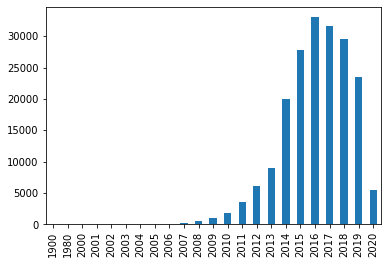

In [15]:
data.year.value_counts().sort_index().plot(kind='bar')

# Merge

In [16]:
data['date'] = data.app_date
data['effecdate'] = data.disbursementdate

keepus = ['loanid', 'effecdate', 'outstandingbalance', 'requiredreserve', 
          'grosscarryingamount', 'netcarryingamount', 'loan2valueratio']
data = data.merge(df_updates_txt[keepus], on=['loanid', 'effecdate'], how='left', validate='many_to_one')

In [17]:
# keep variables from 2010
data = data.loc[(data.year > 2009) & (data.year < 2019)]

# set interest rate to NaN where loanamount is 0
data.loc[data.loanamount==0, ['irate_effec', 'irate_nominal']] = np.nan

# set cols to nan when they are zero or negative
for col in ['loanamount', 'disbursedamount', 'amountout', 'income']:
    data[col].loc[(data[col] <= 0)] = np.nan
    
# drop outlier
data.irate_effec.loc[data.irate_effec == data.irate_effec.max()] = np.nan

# merge m:1 date using usd-to-euro-exchange-rate -> can't do it, don't have that file, 
# using wsj data instead: https://www.wsj.com/market-data/quotes/fx/USDEUR/historical-prices
rates = pd.read_csv('../../data/HistoricalPrices.csv')
rates['date'] = pd.to_datetime(rates.Date)
rates['exchange_rate'] = rates[' Close']

data = data.merge(rates[['date', 'exchange_rate']], on='date', how='left', validate='many_to_one')

# sort
data = data.sort_values(['fuid', 'app_date', 'loanid', 'procedureid', 'year'])


/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Feature engineering

In [18]:
# approved amount
data = data.rename({'loanamount': 'approvedamount'}, axis=1)

data['approvedamount_eu'] = data.apply(exchange_amount, column='approvedamount', axis=1)
data['disbursedamount_eu'] = data.apply(exchange_amount, column='disbursedamount', axis=1)
data['amountout_eu'] = data.apply(exchange_amount, column='amountout', axis=1)

data = data.sort_values(['approvedamount_eu', 'disbursedamount_eu', 'amountout_eu'])
data=data.reset_index()

# total disbursed amount and at firm-level, by year
data_not_na = data.loc[~data.irate_nominal.isna()]
total_temp = data_not_na.groupby(['fuid', 'year'])['disbursedamount_eu'].sum().reset_index().rename(
    columns={'disbursedamount_eu': 'disbursedamount_it'})

data = data.merge(total_temp, on=['fuid', 'year'], how='left', validate='many_to_one')

data['disbursedamount_sh'] = data['disbursedamount_eu'] / data['disbursedamount_it']

# average interest rate: nominal/effective weighted by the actual disbursed amount
data['temp_avirate_nominal'] = data.disbursedamount_sh * data.irate_nominal
data['temp_avirate_effec'] = data.disbursedamount_sh * data.irate_effec

# nominal
data_not_na = data.loc[~data.irate_nominal.isna()]
total_temp = data_not_na.groupby(['fuid', 'year'])['temp_avirate_nominal'].sum().reset_index()
total_temp = total_temp.rename(columns={'temp_avirate_nominal': 'avirate_nominal'})
data = data.merge(total_temp, on=['fuid', 'year'], how='left', validate='many_to_one')

# effective
data_not_na = data.loc[~data.irate_effec.isna()]
total_temp = data_not_na.groupby(['fuid', 'year'])['temp_avirate_effec'].sum().reset_index()
total_temp = total_temp.rename(columns={'temp_avirate_effec': 'avirate_effec'})
data = data.merge(total_temp, on=['fuid', 'year'], how='left', validate='many_to_one')

data = data.drop(columns=['temp_avirate_nominal', 'temp_avirate_effec'])

# average duration
# show that get_duration need not be applied
#data.sort_values('loanperiod').plot(x='index', y='loanduration', kind='scatter')
#data.apply(get_duration, axis=1)
data = data.rename(columns={'loanduration': 'duration'})

# total disbursed amount and at firm-level, by year
data_not_na = data.loc[~data.duration.isna()]
total_temp = data_not_na.groupby(['fuid', 'year'])['disbursedamount_eu'].sum().reset_index().rename(
    columns={'disbursedamount_eu': 'disbursedamount_itdur'})

data = data.merge(total_temp, on=['fuid', 'year'], how='left', validate='many_to_one')

data['disbursedamount_shdur'] = data['disbursedamount_eu'] / data['disbursedamount_itdur']

# effective loan duration
data['temp_duration_effec'] = data.disbursedamount_sh * data.duration

data_not_na = data.loc[~data.disbursedamount_sh.isna() & (~data.duration.isna())]
total_temp = data_not_na.groupby(['fuid', 'year'])['temp_duration_effec'].sum().reset_index().rename(
    columns={'temp_duration_effec': 'duration_effec'})

data = data.merge(total_temp, on=['fuid', 'year'], how='left', validate='many_to_one')

data = data.drop(columns=['temp_duration_effec', 'index'])

data = data.sort_values(['fuid', 'fiscalid', 'loanid', 'app_date'])

In [19]:
data['birth_year'] = data.birthdate.dt.year
data['birth_month'] = data.birthdate.dt.month
data['birth_time'] = data.apply(lambda row: date(year=row.birth_year, month=row.birth_month, day = 1), axis=1)

In [20]:
data.to_parquet('../../data/output/loan_level.pq', engine='pyarrow')

## Aggregate on firm-year level

In [21]:
data_collapsed = data.groupby(['fuid', 'year']).agg({
    'fund': 'max', 'fundcoverage': 'mean',
    'approvedamount_eu': 'sum', 'disbursedamount_eu': 'sum', 'amountout_eu': 'sum',
    'income': 'mean', 'irate_nominal': 'mean', 'irate_effec': 'mean',
    'duration_effec': 'mean', 'duration': 'mean', 'avirate_nominal': 'mean', 'avirate_effec': 'mean',
    'municipality': pd.Series.mode, 'sizeclass': 'mean', 'sizeclass_label': pd.Series.mode,
    'outstandingbalance': 'sum', 'birth_time': pd.Series.mode, 'loantype_label': pd.Series.mode, 
    'loanperiod_label': pd.Series.mode, 'payfreq_label': pd.Series.mode
}).reset_index()

data_collapsed = data_collapsed.rename(columns={'year': 'period'})

In [22]:
data_collapsed['birth_time'] = data_collapsed.birth_time.apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

## Accounting for inflation

In [23]:
deflator_data = pd.read_stata(old_data_folder + 'Other Data/deflatorsdata_indexed.dta')

data_collapsed = data_collapsed.merge(deflator_data, on='period', how='left', validate='many_to_one')

In [24]:
data_collapsed['approvedamount_eu_r'] = data_collapsed.apply(deflator, col='approvedamount_eu', axis=1)
data_collapsed['disbursedamount_eu_r'] = data_collapsed.apply(deflator, col='disbursedamount_eu', axis=1)
data_collapsed['amountout_eu_r'] = data_collapsed.apply(deflator, col='amountout_eu', axis=1)

## add some more variables

In [25]:
disbursedamount_eu_year = data_collapsed.groupby('period')['disbursedamount_eu'].sum()
disbursedamount_eu_year.name = 'disbursedamount_eu_year'
data_collapsed = data_collapsed.merge(disbursedamount_eu_year, on='period', how='left', validate='many_to_one')

data_collapsed['disbursedamount_eu_year_sh_it'] = data_collapsed['disbursedamount_eu'] / data_collapsed['disbursedamount_eu_year']

In [26]:
data_collapsed = data_collapsed[data_collapsed.fuid != 'N/A']

/Users/simonneumeyer/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


# Adding Tax variables

## Sales & number of employees & firm survival

In [27]:
firmdynamics = pd.read_stata(old_data_folder + '/Kosovo Tax Registry/firmdynamics.dta')

In [28]:
#tax_data = pd.read_stata(old_data_folder + 'Kosovo Tax Registry/taxregistry_descriptive.dta')

In [29]:
data_collapsed = data_collapsed.merge(firmdynamics,
                                      how='outer', 
                                      on=['fuid', 'period'], 
                                      validate='1:1', 
                                      indicator=True)

#data_collapsed['participation'] = data_collapsed._merge.map({'both':'participant', 'right_only':'non-participant'})

## Trade Balance

In [30]:
data_collapsed['trade_balance'] = data_collapsed.exports_vat_r - data_collapsed.imports_vat_r

# Assign municipality

In [31]:
# assign municipality
municipalities = pd.read_stata(old_data_folder + 'Geography/municipalities-to-credit.dta')
municipalities = municipalities.rename(columns={'municipalityid_kosovoagency': 'municipalityid'})
tax_raw = pd.read_stata(old_data_folder + 'Kosovo Tax Registry/taxregistry_rawdata.dta')
tax_raw = tax_raw[['fuid', 'period', 'municipalityid']]
municipalities = tax_raw.merge(municipalities, on='municipalityid', how='left', validate='many_to_one')
#municipalities = municipalities[['fuid', 'period', 'municipalityid', 'ethnicity']]

In [32]:
data_collapsed = data_collapsed.merge(municipalities, how='left', on=['fuid', 'period'], validate='one_to_one')

In [33]:
data_collapsed.fuid.nunique()

75246

compatibility:

In [34]:
data_collapsed.municipality = data_collapsed.municipality.astype(str)
data_collapsed.sizeclass_label = data_collapsed.sizeclass_label.astype(str)
data_collapsed['birth_time'] = pd.to_datetime(data_collapsed.birth_time)

In [35]:
data_collapsed['municipality'] = data_collapsed.municipality.apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)
data_collapsed['loantype_label'] = data_collapsed.loantype_label.apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)
data_collapsed['loanperiod_label'] = data_collapsed.loanperiod_label.apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)
data_collapsed['payfreq_label'] = data_collapsed.payfreq_label.apply(lambda x: x[0] if isinstance(x, np.ndarray) else x)

data_collapsed.tech_class = data_collapsed.tech_class.astype(str)
data_collapsed.industry_class = data_collapsed.industry_class.astype(str)

In [36]:
#df = data_collapsed[['fuid', 'period', 'deathdate_tx', 'exit', 'exiter']].sort_values(['fuid', 'period'])

# Create death date:

In [6]:
#df[df.groupby('fuid')['exit'].transform() == 1]
death_dates = data_collapsed[data_collapsed.exit==1][['fuid', 'period']]
death_dates = death_dates.rename(columns={'period': 'death_year'})
death_dates = death_dates.sort_values(['fuid', 'death_year'])

# take last exit in case of more than one exit date
death_dates = death_dates.groupby('fuid').last().reset_index()

AttributeError: 'DataFrame' object has no attribute 'exit'

In [38]:
data_collapsed = data_collapsed.merge(death_dates, how='left', on='fuid', validate='m:1')

In [39]:
death_alt = data_collapsed.deathdate_tx.apply(date_parser)
death_alt = pd.to_datetime(death_alt).dt.year

In [40]:
L = []
for i in range(len(data_collapsed)):
    if data_collapsed.death_year[i] == data_collapsed.death_year[i]:
        L.append(data_collapsed.death_year[i])
    else:
        L.append(death_alt[i])

data_collapsed['death_year'] = L

# Encode target variable (kcgf)

In [7]:
def treatment_filler(row, treatment_var, fund_year_var):
    
    if (row[treatment_var] == 1) and (row.period >= row[fund_year_var]):
        return 1
    elif row[treatment_var] == 1:
        return 0
    else:
        return np.nan

In [12]:
data_collapsed

,fuid,period,municipalityid_tx,nace_class_num,nace_division,nace_section_desc_num,age,size_tx,turnover_tx,turnover_status_tx,employees_tx,employment_status_tx,wages_tx,legalformid_tx,exports_vat,purchases_vat,imports_vat,domestic_vat,investment_vat,investment_dom_vat,investment_imp_vat,wages_pd_r,investment_vat_r,production_costs_r,valueadded,productivity,wages_worker,valueadded_worker,wage_status,investment_status,purchases_status,vat_status,sme_tx,employer,deathyear_tx,cat_turnover,sector_expo,export_tx,import_tx,impoexpo,onlyexport_tx,onlyimport_tx,nocommerce,export_sh,position,act,inact,age_status,startup,young,mature,digitalintensive,avwage_tx_r,avwage_sector,foreignk_sh_pr,export_pr,import_pr,expoimpo_pr,noimponoexpo_pr,importonly_pr,exportonly_pr,registration,turnover_tot,labor_tot,num_loans,num_loans_kcgf,duration,avirate_nominal,avirate_effec,approvedamount_eu_r,disbursedamount_eu_r,amountout_eu_r,credit_dataset,manufacturing,utilities,construction,trade,transport,hotelsfood,communications,financial,professional,services,allsectors,sector_tfp,econ_sector,has_loan,has_kcgf,no_loan,treated_loan,treated_kcgf,after_loan,after_kcgf,exiter,credit_treatment_status,lag_turnover_tx,lag_productivity,lag_employees_tx,lag_wages_worker
0,29820429,2015.0,20.0,Retail sale of footwear and leather goods in s...,"Retail trade, except of motor vehicles and mot...",WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...,0.0,Micro (0-9),2302.000000,Non missing,NaN,Missing,NaN,Personal Business Enterprise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Missing,7.0,SME (0-249),0.0,NaN,"0 - 2,500",Wholesale and retail trade,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,Young (<6 years old),1.0,1.0,0.0,Other sectors,NaN,1880.959229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15313713.0,516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Retail,Wholesale & retail,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"No loan, no KCGF",NaN,NaN,NaN,NaN
1,29820429,2016.0,20.0,Retail sale of footwear and leather goods in s...,"Retail trade, except of motor vehicles and mot...",WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...,1.0,Micro (0-9),2550.000000,Non missing,NaN,Missing,NaN,Personal Business Enterprise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Missing,7.0,SME (0-249),0.0,NaN,"2,500 - 5,000",Wholesale and retail trade,0.0,0.0,0.0,0.0,0.0,1.0,NaN,2.0,0.0,0.0,Young (<6 years old),1.0,1.0,0.0,Other sectors,NaN,1880.959229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15027366.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Retail,Wholesale & retail,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"No loan, no KCGF",2302.0,NaN,NaN,NaN
2,29820429,2017.0,20.0,Retail sale of footwear and leather goods in s...,"Retail trade, except of motor vehicles and mot...",WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...,2.0,Micro (0-9),1855.000000,Non missing,NaN,Missing,NaN,Personal Business Enterprise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Missing,7.0,SME (0-249),0.0,NaN,"0 - 2,500",Wholesale and retail trade,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,0.0,0.0,Young (<6 years old),1.0,1.0,0.0,Other sectors,NaN,1880.959229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18159388.0,554.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Retail,Wholesale & retail,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,"No loan, no KCGF",2550.0,NaN,NaN,NaN
3,29820429,2018.0,20.0,Retail sale of footwear and leather goods in s...,"Retail trade, except of motor vehicles and mot...",WHOLESALE AND RETAIL TRADE; REPAIR OF MOTOR VE...,3.0,Micro (0-9),2510.000000,Non missing,NaN,Missing,NaN,Personal Business Enterprise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Missing,7.0,SME (0-249),0.0,NaN,"2,500 - 5,000",Wholesale and retail trade,0.0,0.0,0.0,0.0,0.0,1.0,NaN,4.0,0.0,0.0,Young (<6 years old),0.0,1.0,0.0,Other sectors,NaN,1880.959229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15585347.0,5

In [13]:
# Whether a firm received credit or not
#data_collapsed['credit_label'] = data_collapsed._merge.map({'both': 'credit received',
#                                                            'right_only': 'no credit received',
#                                                            'left_only': 'credit received'})
#data_collapsed['credit'] = data_collapsed._merge.map({'both': 1, 'right_only': 0, 'left_only': 1})

In [14]:
#data_collapsed[[x for x in data_collapsed.columns if 'exit' in x]]

In [43]:
# Whether a firm received a kcg-funded credit or not
kcgf_dummy = data_collapsed[['fuid', 'period', 'fund', 'fundcoverage']].groupby('fuid')['fund'].max().reset_index()
kcgf_dummy = kcgf_dummy.rename(columns={'fund': 'kcgf'})
data_collapsed = data_collapsed.merge(kcgf_dummy, how='left', on='fuid', validate='m:1')

In [52]:
# Whether a firm received a non-kcg-funded credit or not
loaned_dummy = data_collapsed[['fuid', 'credit']].groupby('fuid')['credit'].max().reset_index()
loaned_dummy = loaned_dummy.rename(columns={'credit': 'loaned'})
data_collapsed = data_collapsed.merge(loaned_dummy, how='left', on='fuid', validate='m:1')

In [50]:
# Whether a firm has already been treated by the kcg-funded credit or not
funded = data_collapsed[data_collapsed.fund==1][['fuid', 'period']]
funded = funded.rename(columns={'period': 'fund_year'})
funded = funded.groupby('fuid').first().reset_index()

data_collapsed = data_collapsed.merge(funded, how='left', on='fuid', validate='m:1')

data_collapsed['kcgf_treated'] = data_collapsed.apply(treatment_filler, 
                                                      treatment_var='kcgf', fund_year_var='fund_year', axis=1)

In [55]:
# Whether a firm has already been treated by the non-kcg-funded credit or not
credit = data_collapsed[data_collapsed.credit==1][['fuid', 'period']]
credit = credit.rename(columns={'period': 'loaned_year'})
credit = credit.groupby('fuid').first().reset_index()

data_collapsed = data_collapsed.merge(credit, how='left', on='fuid', validate='m:1')

data_collapsed['loaned_treated'] = data_collapsed.apply(treatment_filler, 
                                                      treatment_var='loaned', fund_year_var='loaned_year', axis=1)

In [45]:
#data_collapsed[['fuid', 'period', 'fund', 'kcgf', 'kcgf_treated', 'fund_year']]

In [46]:
#data_collapsed.kcgf.value_counts(dropna=False)

In [63]:
#data_collapsed.loaned_treated.value_counts()

In [67]:
#data_collapsed[data_collapsed.fuid==29820543.0]

In [64]:
# assuming where we don't have info on kcgf (nan) that there has not been kcgf funding (0)
data_collapsed.kcgf = data_collapsed.kcgf.fillna(0)
data_collapsed.kcgf_treated = data_collapsed.kcgf_treated.fillna(0)

data_collapsed.loaned = data_collapsed.loaned.fillna(0)
data_collapsed.loaned_treated = data_collapsed.loaned_treated.fillna(0)

In [65]:
def fund_identifier(row):
    if row.kcgf==1:
        return 1
    elif row.loaned==1 and row.kcgf==0:
        return 0
    elif row.loaned==0 and row.kcgf==0:
        return 2

data_collapsed['kcgf'] = data_collapsed.apply(fund_identifier, axis=1)
data_collapsed['kcgf_label'] = data_collapsed.kcgf.map({0: 'not funded by KCGF', 1: 'funded by KCGF', 2: 'no loan received'})

# Rename and compatibilize

In [66]:
data_collapsed = data_collapsed.replace('', np.nan)

data_collapsed = data_collapsed.rename(columns={
    'ethnicity': 'Serbian-majority municipality', 
    'export_tx': 'Exporting firm', 
    'age':'Age',
    'employees_tx': 'Number of employees',
    'hh_turnover_sector': 'Market concentration'
})

In [4]:
data_collapsed = pd.read_stata('../../data/firm_year_level.dta')

# Create productivity variables

In [7]:
data_collapsed['Productivity'] = data_collapsed['turnover_tx'] / data_collapsed['employees_tx']

data_collapsed['Productivity'] = data_collapsed['Productivity'].replace(np.inf, np.nan)

In [8]:
data_collapsed = data_collapsed.sort_values(['fuid','period'])
data_collapsed = data_collapsed.set_index(['fuid', 'period'])

In [9]:
prod_lag_1 = data_collapsed.groupby(level='fuid')['Productivity'].shift(1).values
data_collapsed = data_collapsed.reset_index()
data_collapsed['Productivity_t_1'] = prod_lag_1

## Including exited firms

In [71]:
dead_firms = data_collapsed[data_collapsed.exit==1]
dead_firms = dead_firms[['fuid', 'period', 'Number of employees', 'turnover_tx_r', 
                         'Productivity', 'credit', 'kcgf']].values

L = []
for row in dead_firms:
    for i in range(int(row[1]+1), 2019):
        # create rows to add:
        new_row = [row[0], i, 0, 0, 0, row[-2], row[-1]]
        L.append(new_row)
        
dead_panel = pd.DataFrame(data=L, columns=['fuid', 'period', 'Number of employees',
                                           'turnover_tx_r', 'Productivity', 'credit', 'kcgf'])

# Gender

In [72]:
df_survey = pd.read_stata(old_data_folder + 'Kosovo Productivity Survey/productivitysurvey_fuid.dta',
              convert_categoricals=False)

In [73]:
data_collapsed = data_collapsed.merge(df_survey[['fuid','gender_pr']], on='fuid', 
                                      how='left', validate='m:1', indicator='gender_merge')

In [74]:
data_collapsed.gender_pr.value_counts(dropna=False, normalize=True)

NaN    0.935876
0.0    0.059909
1.0    0.004215
Name: gender_pr, dtype: float64

# Save dataset

In [11]:
#data_collapsed = data_collapsed.drop(columns=['isic_1', 'isic_2', 'isic_3',
#                                              '_mergenace',
#                                              'isic_letter_desc',
#                                              'isic_2d_desc',
#                                              'isic_3d_desc',
#                                              'isic_4d_desc',
#                                              '_mergeisic',
#                                              'nace_class_main',
#                                              'nace_section_main',
#                                              'nace_section_desc_main',
#                                              'nace_division_main',
#                                              'nace_division_desc_main',
#                                              'nace_group_main',
#                                              'nace_group_desc_main',
#                                              'nace_class_desc_main',
#                                              'isic_4_main',
#                                              'isic_1_main',
#                                              'isic_2_main',
#                                              'isic_3_main',
#                                              '_mergemainact',
#                                              'fdi_10',
#                                              'fdi_50',
#                                              'fdi',
#                                              'fdi_025',
#                                              'fdi_2550',
#                                              'fdi_50plus',
#                                              'fdi_sh',
#                                              'fdi_sh_sq', 
#                                              'gender_merge',
#                                              '_merge',
#                                              'mergetrade_pr'
#                                             ])

In [12]:
data_collapsed.to_parquet('../../data/output/firm_year_level.pq', engine='pyarrow')

In [77]:
#data_collapsed = pd.read_parquet('../../data/output/firm_year_level.pq', engine='pyarrow')

In [78]:
#data_collapsed.columns = pd.Series(data_collapsed.columns).replace(' ', '_')
#data_collapsed = data_collapsed.replace(np.inf, np.nan)

In [13]:
data_collapsed.to_stata('../../data/output/firm_year_level.dta')

In [80]:
dead_panel.to_parquet('../../data/output/firm_year_level_dead.pq', engine='pyarrow')